In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import csv
from datetime import datetime
from collections import defaultdict

## Functions

In [2]:
def parse_date(arg):
    if arg == "":
        return None
    else:
        return datetime.strptime(arg, "%Y-%m-%d").date()

def parse_int(arg):
    if arg == '':
        return None
    else:
        return int(arg)

def parse_float(arg):
    if arg == '' or None:
        return None
    else:
        return float(arg)

def date_sustract(date1,date2):
    if date1 == None or date2 == None:
        return -100
    else:
        return (date1-date2).days

def students_number(arr):
    students = set()
    for student in arr:
        students.add(student["account_key"])
    return len(students)

def get_students(arr):
    students = set()
    for student in arr:
        students.add(student["account_key"])
    return students

def remove_students(arr,to_delete):
    tmp = []

    for data in arr:
        if data["account_key"] not in to_delete:
            tmp.append(data)

    return tmp

def remove_free_trial(arr,students):
    non_free_trial = []

    for data in arr:
        if data['account_key'] in students:
            non_free_trial.append(data)

    return non_free_trial

def data_per_account(data,column):
    data_per_account = {}

    for account_key,data in data.items():
        total_data = 0
        for values in data:
            total_data += values[column]
        data_per_account[account_key] = total_data

    return  data_per_account

def group_data(dataList):
    data_dict = defaultdict(list)

    for data in dataList:
        account_key = data["account_key"]
        data_dict[account_key].append(data)
    return data_dict

def describe_data(data):
    print("Mean",np.average(data))
    print("Standart deviation:",np.std(data))
    print("Minmun",np.min(data))
    print("Maximun",np.max(data))


In [3]:
def get_enrollments():

    enrollemnts_path = 'csv_files/enrollments.csv'

    with open(enrollemnts_path) as f:
        csv_reader = csv.DictReader(f)


        #print(csv_reader.dialect)
        #print(csv_reader.fieldnames)

        enrollments = []

        days_to_cancel = []

        for data in csv_reader:

            data["account_key"] = parse_int(data["account_key"])
            data["cancel_date"] = parse_date(data["cancel_date"])
            data["join_date"] = parse_date(data["join_date"])
            data["days_to_cancel"] = parse_int(data["days_to_cancel"])
            data["is_udacity"] = data["is_udacity"] == "True"
            data["is_canceled"] = data["is_canceled"] == "True"


            enrollments.append(data)

        for data in enrollments:
            tmp = date_sustract(data["cancel_date"], data["join_date"])
            if tmp == -100:
                continue
            days_to_cancel.append(tmp)

        tmp = date_sustract(enrollments[0]["cancel_date"],enrollments[0]["join_date"])
        #print(enrollments[0]["cancel_date"],enrollments[0]["join_date"], "=",tmp,type(tmp),'\n\n' )

        days_to_cancel.sort()
        days_to_cancel.reverse()
        #plt.hist(days_to_cancel,100,histtype='bar',ec='black')
        #plt.grid(True)
        #plt.show()
        print ("enrollments =",(len(enrollments)), students_number(enrollments))

        return enrollments


In [4]:
def get_project_submissions():
    project_submissions_path = "csv_files/project_submissions.csv"
    with open(project_submissions_path) as f:
        project_submissions_csv = csv.DictReader(f)

        #print(list(project_submissions_csv)[0])
        #print(project_submissions_csv.fieldnames)


        project_submissions = []

        for data in project_submissions_csv:
            data["account_key"] = parse_int(data["account_key"])
            data["creation_date"] = parse_date(data["creation_date"])
            data["completion_date"] = parse_date(data["completion_date"])
            project_submissions.append(data)

        plot_data = []
        for data in project_submissions:
            tmp = date_sustract(data["completion_date"],data["creation_date"])
            if tmp == -100 and tmp <40:
                continue
            plot_data.append(tmp)

        #print("project_submissions =",len(project_submissions), students_number(project_submissions))
        #plt.hist(plot_data,100, histtype="bar",ec="black")
        #plt.plot(plot_data,"r.")
        #plt.show()

        return project_submissions


In [5]:
def get_daily_engagement():
    project_daily_engagement = 'csv_files/daily_engagement.csv'

    with open(project_daily_engagement) as f:
        daily_engagement_csv = csv.DictReader(f)

        daily_engagement = []
        plot_data = []
        #print(daily_engagement_csv.fieldnames)
        for data in daily_engagement_csv:
            data['account_key'] = parse_int(data['account_key'])
            data['utc_date'] = parse_date(data['utc_date'])
            data['num_courses_visited'] = parse_float(data['num_courses_visited'])
            data['total_minutes_visited'] = parse_float(data['total_minutes_visited'])
            data['lessons_completed'] = parse_float(data['lessons_completed'] )
            data['projects_completed'] = parse_float(data['projects_completed'])
            if data['num_courses_visited'] > 0:
                data['is_visited'] = 1
            else:
                data['is_visited'] = 0
            
            daily_engagement.append(data)
            plot_data.append(data['projects_completed'])


        #print("daily_engagement =",len(daily_engagement), students_number(daily_engagement))
        #plt.hist(plot_data,3)
        #plt.show()
        return daily_engagement


In [6]:
"""
def get_daily_engagement_full():
    project_daily_engagement_full = '../Data/daily_engagement_full.csv'

    with open(project_daily_engagement_full) as f:
        daily_engagement_csv = csv.DictReader(f)

        daily_engagement = []
        plot_data = []
        print(daily_engagement_csv.fieldnames)

        for data in daily_engagement_csv:
            data['account_key'] = parse_int(data['account_key'])
            data['utc_date'] = parse_date(data['utc_date'])
            data['total_minutes_visited'] = parse_float(data['total_minutes_visited'])
            data['lessons_completed'] = parse_float(data['lessons_completed'] )
            data['projects_completed'] = parse_float(data['projects_completed'])
            daily_engagement.append(data)
            plot_data.append(data['projects_completed'])
            print(data)

        # acct,registration_date,subscription_start,course_key,sibling_key,course_title,has_visited
        #[ 'acct', 'registration_date', 'subscription_start', 'course_key', 'sibling_key', 'course_title', 'has_visited', 'lessons_completed', 'projects_completed', 'account_key']
        #print("daily_engagement =",len(daily_engagement), students_number(daily_engagement))
        #plt.hist(plot_data,3)
        #plt.show()
        return daily_engagement
"""
print("nothing")

nothing


In [7]:

enrollments = get_enrollments()
daily_engagement = get_daily_engagement()
#daily_engagement_full = get_daily_engagement_full()
project_submissions = get_project_submissions()
students_engagement = get_students(daily_engagement)
students_enrollments = get_students(enrollments)


to_delete = set()

for data in enrollments:
    if data["is_udacity"]:
        to_delete.add(data["account_key"])

print(to_delete)

enrollments = remove_students(enrollments,to_delete)
daily_engagement = remove_students(daily_engagement,to_delete)
project_submissions = remove_students(project_submissions,to_delete)


#print("enrollments =",len(enrollments), students_number(enrollments))
#print("daily_engagement =",len(daily_engagement), students_number(daily_engagement))
#print("project_submissions =",len(project_submissions), students_number(project_submissions))



enrollments = 1640 1302
{448, 312, 1069, 1101, 818, 1304}


In [8]:



paid_students = {}

#print(enrollments[0])


for data in enrollments:
    if data["days_to_cancel"] == None or data["days_to_cancel"] > 7 :
        account_key = data["account_key"]
        join_date = data["join_date"]

        if account_key not in paid_students.keys() or join_date > paid_students[account_key]:
            paid_students[account_key] = data["join_date"]



print(len(paid_students))


paid_enrollments = remove_free_trial(enrollments,paid_students.keys())
paid_engagement =  remove_free_trial(daily_engagement,paid_students.keys())
paid_submissions = remove_free_trial(project_submissions,paid_students.keys())


print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))


paid_engagement_in_first_week = []

for data in paid_engagement:

    account_key = data['account_key']
    join_date  = paid_students[account_key]
    engagement_record_date = data['utc_date']
    tmp = date_sustract(engagement_record_date,join_date)
    if tmp < 7 and tmp >= 0:
        paid_engagement_in_first_week.append(data)

print(len(paid_engagement_in_first_week))




995
1293
134549
3618
6919


In [9]:
#see students in first week

engagement_by_account = defaultdict(list)

for data in paid_engagement_in_first_week:
    account_key = data['account_key']
    engagement_by_account[account_key].append(data)


total_minutes_per_account = {}

for account_key,data in engagement_by_account.items():
    total_minutes = 0
    for values in data:
        total_minutes += values['total_minutes_visited']
    total_minutes_per_account[account_key] = total_minutes

total_minutes = list(total_minutes_per_account.values())

#print(type(total_minutes))

minutes_average = np.average(total_minutes)

print("Mean",minutes_average)
print("Standart deviation:",np.std(total_minutes))
print("Minmun",np.min(total_minutes))
print("Maximun",np.max(total_minutes))





Mean 306.70832675342825
Standart deviation: 412.99693340852957
Minmun 0.0
Maximun 3564.7332644989997


In [10]:
max_minutes = np.max(total_minutes)
for key in total_minutes_per_account.keys():
    if total_minutes_per_account[key] == max_minutes:
        print(key)
        
        

163


In [11]:
print("id","\t utc_date ","courses_visited","projects_completed","lessons_completed","\ttotal_minutes_visited")

suma = 0
for data in engagement_by_account[108]:
    print(data["account_key"],"\t",data["utc_date"],"\t",data["num_courses_visited"],"\t\t",data["projects_completed"],"\t\t",data["lessons_completed"],"\t\t\t",data["total_minutes_visited"]/60)
    suma += data["total_minutes_visited"]

print(suma/(60*24))
    

id 	 utc_date  courses_visited projects_completed lessons_completed 	total_minutes_visited
108 	 2015-04-20 	 2.0 		 0.0 		 0.0 			 0.43189643055666666
108 	 2015-04-21 	 1.0 		 0.0 		 0.0 			 0.05678038611116667
108 	 2015-04-22 	 2.0 		 0.0 		 0.0 			 1.6519776861116666
108 	 2015-04-23 	 1.0 		 2.0 		 0.0 			 0.5971936777783333
108 	 2015-04-24 	 0.0 		 0.0 		 0.0 			 0.0
108 	 2015-04-25 	 0.0 		 0.0 		 0.0 			 0.0
108 	 2015-04-26 	 0.0 		 0.0 		 0.0 			 0.0
0.11407700752324305


In [12]:
lessons_completed_per_account = {}

for account_key,data in engagement_by_account.items():
    total_lessons = 0
    for values in data:
        total_lessons += values['lessons_completed']
    lessons_completed_per_account[account_key] = total_lessons

total_lessons = list(lessons_completed_per_account.values())

#print(type(total_minutes))

print("Mean",np.average(total_lessons))
print("Standart deviation:",np.std(total_lessons))
print("Minmun",np.min(total_lessons))
print("Maximun",np.max(total_lessons))

Mean 1.636180904522613
Standart deviation: 3.002561299829423
Minmun 0.0
Maximun 36.0


In [13]:
lessons_completed_per_account = data_per_account(engagement_by_account,'lessons_completed')
total_lessons = list(lessons_completed_per_account.values())
describe_data(total_lessons)



Mean 1.636180904522613
Standart deviation: 3.002561299829423
Minmun 0.0
Maximun 36.0


In [14]:
visisted_classroom_per_account = {}

for account_key,data in engagement_by_account.items():
    total_visits = 0
    for values in data:
        if values['num_courses_visited']:
            total_visits += 1
    visisted_classroom_per_account[account_key] = total_visits

total_visits = list(visisted_classroom_per_account.values())

#print(type(total_minutes))

describe_data(total_visits)

Mean 2.8673366834170855
Standart deviation: 2.2551980029196814
Minmun 0
Maximun 7


## Students who pass engagement and whos not pass

In [15]:
#get account keys of whos passed the engagement
passed_keys = list()
not_passed_keys = list()

for data in paid_submissions:
    if data["lesson_key"] == "746169184" or data["lesson_key"] == "3176718735":
        if data["assigned_rating"] == 'PASSED' or data["assigned_rating"] == 'DISTINCTION' :
            passed_keys.append(data["account_key"])
        else:
            not_passed_keys.append(data["account_key"])
    
print(len(passed_keys))
print(len(not_passed_keys))

652
845


In [16]:
passing_engagement = []
non_passing_engagement = []

for data in paid_engagement_in_first_week:
    account_key = data["account_key"]
    
    if account_key in passed_keys:
        passing_engagement.append(data) 
    else:
        non_passing_engagement.append(data)


In [17]:
passing_engagement_data_dict = group_data(passing_engagement)
non_passing_engagement_data_dict = group_data(non_passing_engagement)
    

In [18]:
print("passing studentes")
passing_engagement_per_account = data_per_account(passing_engagement_data_dict,'total_minutes_visited')
pass_total_minutes = list(passing_engagement_per_account.values())
describe_data(pass_total_minutes)
print("\n\nnon passing students")
non_passing_engagement_per_account = data_per_account(non_passing_engagement_data_dict,'total_minutes_visited')
non_pass_total_minutes = list(non_passing_engagement_per_account.values())
describe_data(non_pass_total_minutes)

passing studentes
Mean 394.58604648350865
Standart deviation: 448.4995193265521
Minmun 0.0
Maximun 3564.7332644989997


non passing students
Mean 143.32647426675584
Standart deviation: 269.5386190114951
Minmun 0.0
Maximun 1768.5227493319999


In [19]:
print("passing studentes")
passing_engagement_per_account = data_per_account(passing_engagement_data_dict,'lessons_completed')
pass_lessons_completed = list(passing_engagement_per_account.values())
describe_data(pass_lessons_completed)
print("\n\nnon passing students")
non_passing_engagement_per_account = data_per_account(non_passing_engagement_data_dict,'lessons_completed')
non_pass_lessons_completed = list(non_passing_engagement_per_account.values())
describe_data(non_pass_lessons_completed)

passing studentes
Mean 2.052550231839258
Standart deviation: 3.1422270555779344
Minmun 0.0
Maximun 36.0


non passing students
Mean 0.8620689655172413
Standart deviation: 2.5491599418312028
Minmun 0.0
Maximun 27.0


In [25]:
print("passing studentes")
passing_engagement_per_account = data_per_account(passing_engagement_data_dict,'is_visited')
pass_days_visited = list(passing_engagement_per_account.values())
describe_data(pass_days_visited)
print("\n\nnon passing students")
non_passing_engagement_per_account = data_per_account(non_passing_engagement_data_dict,'is_visited')
non_pass_days_visited = list(non_passing_engagement_per_account.values())
describe_data(non_pass_days_visited)

passing studentes
Mean 3.384853168469861
Standart deviation: 2.2588214709184595
Minmun 0
Maximun 7


non passing students
Mean 1.9051724137931034
Standart deviation: 1.9057314413619046
Minmun 0
Maximun 7


### Ploting hystogram

(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <a list of 10 Patch objects>)

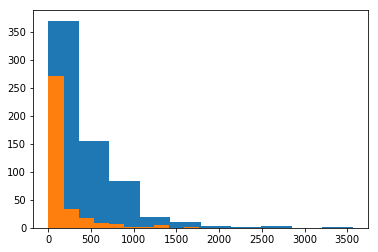

In [21]:
plt.hist(pass_total_minutes)
plt.hist(non_pass_total_minutes)

(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

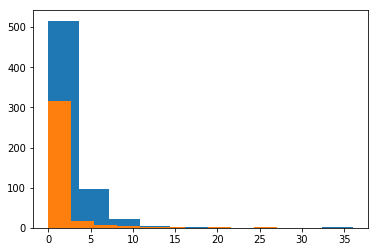

In [22]:
plt.hist(pass_lessons_completed)
plt.hist(non_pass_lessons_completed)

(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

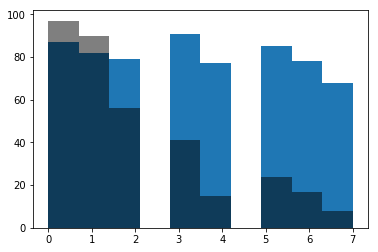

In [36]:
plt.hist(pass_days_visited)
plt.hist(non_pass_days_visited, fc=(0, 0, 0, 0.5))